In [1]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

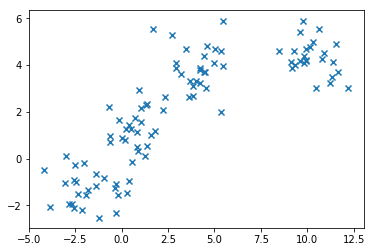

In [31]:
# We will be generating random data using make blob class
X1, y1 = make_blobs(n_samples=100, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)
plt.scatter(X1[:, 0], X1[:, 1], marker='x') 

In [32]:
print(X1)
print(y1)

[[11.57199865  4.91753841]
 [ 9.61703501  4.18391036]
 [-1.19821305 -2.52289206]
 [ 3.86180495  3.11752012]
 [ 3.6310323   2.63433816]
 [-0.68103593  2.21645229]
 [-0.20348621 -1.55108622]
 [-0.61615871  0.68823634]
 [ 4.00521045  3.31735023]
 [-1.91071743 -1.54298869]
 [11.38634282  4.13102029]
 [ 9.91465418  4.69746702]
 [10.30733689  5.00290847]
 [ 0.27194794 -1.45411935]
 [-2.02847133 -0.19799101]
 [ 5.48279578  5.90140587]
 [ 0.9127353   2.93265933]
 [ 9.35539571  4.00294229]
 [ 0.85322817  1.13297164]
 [-2.44840324 -0.99916374]
 [ 0.81257093  0.49291711]
 [-2.15864032 -2.19880354]
 [ 2.24594085  2.09782645]
 [10.49030479  3.0038413 ]
 [ 4.96228174  4.1047356 ]
 [ 2.94691706  3.86947378]
 [-0.15419254  1.66823871]
 [-1.40386572 -1.15943891]
 [-0.37238818 -1.27882456]
 [-4.16594925 -0.47899533]
 [10.82021146  4.239894  ]
 [-1.80246694 -1.32243296]
 [ 1.04808691  2.16668473]
 [ 0.37932149  1.43432288]
 [ 0.49394554  1.26381768]
 [10.17227331  4.77228242]
 [ 3.1835119   3.60683991]
 

In [33]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

In [35]:
agglom.fit(X1,y1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=4,
            pooling_func=<function mean at 0x00000246EF6DABF8>)

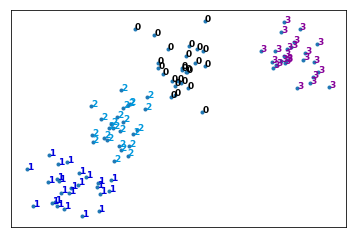

In [37]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

In [39]:
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[0.         0.14773793 1.1780465  ... 0.43876849 0.62476454 0.06366835]
 [0.14773793 0.         1.03427212 ... 0.31610581 0.48011518 0.08751714]
 [1.1780465  1.03427212 0.         ... 0.89115129 0.64830691 1.11441745]
 ...
 [0.43876849 0.31610581 0.89115129 ... 0.         0.24652877 0.39414134]
 [0.62476454 0.48011518 0.64830691 ... 0.24652877 0.         0.56753196]
 [0.06366835 0.08751714 1.11441745 ... 0.39414134 0.56753196 0.        ]]


In [40]:
Z = hierarchy.linkage(dist_matrix, 'complete')

C:\Users\abhijeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


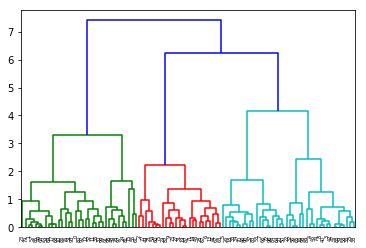

In [41]:
dendro = hierarchy.dendrogram(Z)